<a href="https://colab.research.google.com/github/amanjain487/panoptic-segmentation-using-DETR/blob/main/Train_Bounding_Box_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Train Model for Object Detection

## Get CUDA Device Properties

In [ ]:
import time
import glob
import torch
import os

from IPython.display import Image
print(torch.cuda.get_device_properties(0))


_CudaDeviceProperties(name='Tesla P100-PCIE-16GB', major=6, minor=0, total_memory=16280MB, multi_processor_count=56)


# Mount Google Drive
- To continue training from last checkpoint
- To save model after every epoch

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


# Install Required Libraries/Packages

In [ ]:
# install panopticapi package
!pip install git+https://github.com/cocodataset/panopticapi.git

  Cloning https://github.com/cocodataset/panopticapi.git to /tmp/pip-req-build-8oa18dpe
  Running command git clone -q https://github.com/cocodataset/panopticapi.git /tmp/pip-req-build-8oa18dpe
  Created wheel for panopticapi: filename=panopticapi-0.1-py3-none-any.whl size=8306 sha256=333ff82a0531d3b86c7c92c4b0e2d6f90469c651868cd8d4cfe4cb9a4e07cc46
  Stored in directory: /tmp/pip-ephem-wheel-cache-p1se6cvh/wheels/ad/89/b8/b66cce9246af3d71d65d72c85ab993fd28e7578e1b0ed197f1
Successfully built panopticapi


In [ ]:
# find if gpu is being used or not
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
device

device(type='cuda')

# Train Box Model

In [ ]:
import os
os.chdir("/content/drive/MyDrive/Panoptic Segmentation using DETR/detr")

# run the script provided by facebook detr
!python main.py --coco_path ../data/  --coco_panoptic_path ../data/ --dataset_file coco_panoptic --output_dir "/content/drive/MyDrive/Panoptic Segmentation using DETR/detr/output/box_model"  --epoch 500 --batch_size 2 --resume "/content/drive/MyDrive/Panoptic Segmentation using DETR/detr/output/box_model/checkpoint.pth"

# Visualize Loss and Accuracies


In [ ]:
os.chdir("/content/drive/MyDrive/Panoptic Segmentation using DETR/detr")

from util.plot_utils import plot_logs

from pathlib import Path
# load the log file
log_directory = [Path('output/box_model/')]

## Loss and mAP

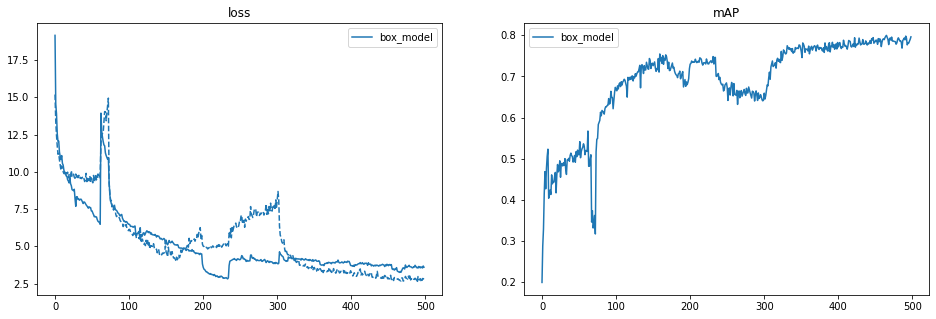

In [ ]:
fields_of_interest = (
    'loss',
    'mAP',
    )

plot_logs(log_directory,
          fields_of_interest)

## BBox loss and GIOU loss






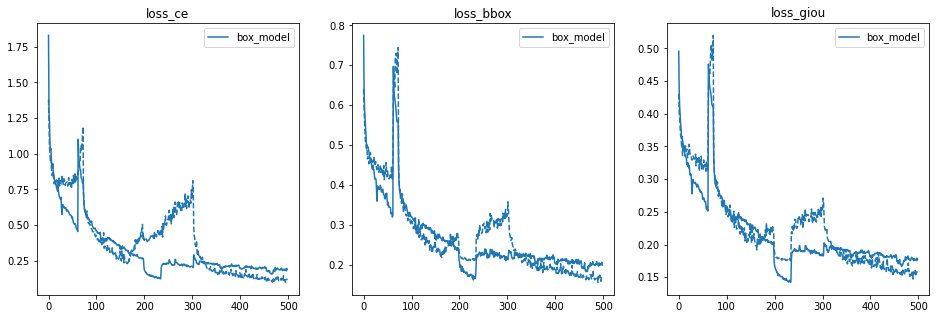

In [ ]:
fields_of_interest = (
    'loss_ce',
    'loss_bbox',
    'loss_giou',
    )
 
plot_logs(log_directory,
          fields_of_interest)

## Class Error

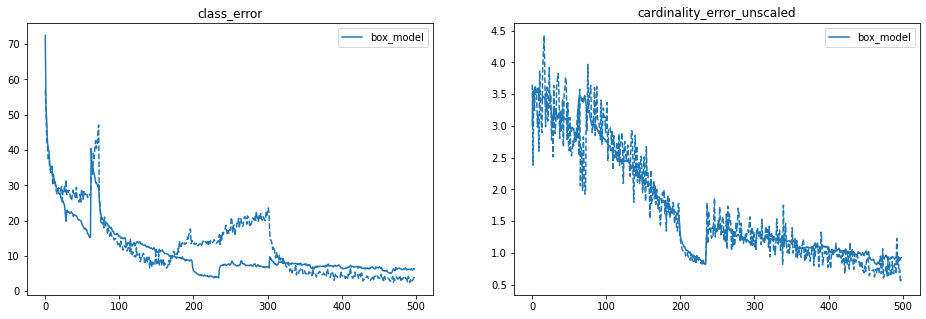

In [ ]:
fields_of_interest = (
    'class_error',
    'cardinality_error_unscaled',
    )

plot_logs(log_directory,
          fields_of_interest)   